In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

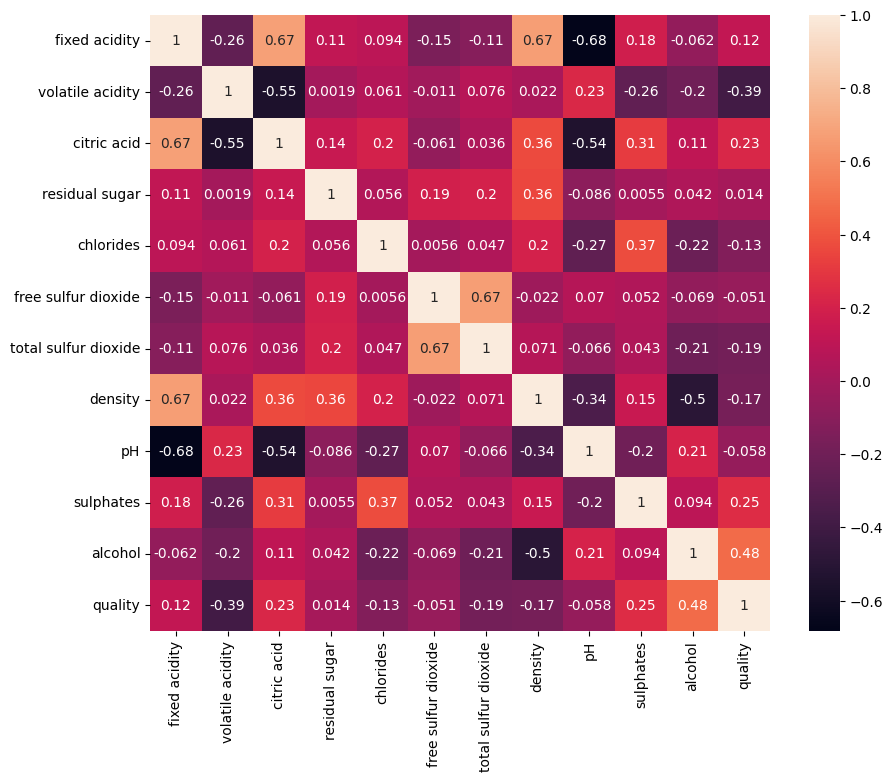

In [3]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True)

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [4]:
df.corr().quality

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

fixed acidity, volatile acidity, citric acid, chlorides, total sulfur dioxide, density,	sulphates and alcohol are key features of wine quality dataset

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [5]:
df.isnull().sum()   # there is no missing data in wine quality dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Normally we use data imputaation teachnique, one is mean or median imputation and other one is Mode imputation. mean, median imputation techniques can used only for numerical features, if in dataset outliers are present then we use median imputation otherwise we use mean imputation. for categorical feature we use mode imputation technique and replace null value by highesyt frequency element.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?
### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [6]:
df1 = pd.read_csv('stud.csv')
df1.head(2)
# gender, race_ethinicity, Lunch, test prepartion course are key factors that affect the student's performance in exam

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [7]:

df1['total_score']=(df1['math_score']+df1['reading_score']+df1['writing_score'])
df1['average']=df1['total_score']/3
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [8]:
df1.test_preparation_course = df1.test_preparation_course.map({"none":0,"completed":1})

In [9]:
df1.lunch =df1.lunch.map({"standard":0,"free/reduced":1})

In [10]:
df1.gender = df1.gender.map({"male":0,"female":1})

In [11]:
df1.race_ethnicity = df1.race_ethnicity.map({"group A":1,"group B":2,"group C":3,"group D":4,"group E":5})

In [12]:
df1 = pd.get_dummies(df1).astype(int)

In [13]:
df1.head(2)

,gender,race_ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school
0,1,2,0,0,72,72,74,218,72,0,1,0,0,0,0
1,1,3,0,1,69,90,88,247,82,0,0,0,0,1,0


In [14]:
df1.corr().average

gender                                            0.130483
race_ethnicity                                    0.185131
lunch                                            -0.290390
test_preparation_course                           0.256737
math_score                                        0.918771
reading_score                                     0.970048
writing_score                                     0.965409
total_score                                       0.999821
average                                           1.000000
parental_level_of_education_associate's degree    0.067043
parental_level_of_education_bachelor's degree     0.106648
parental_level_of_education_high school          -0.162428
parental_level_of_education_master's degree       0.102332
parental_level_of_education_some college          0.026907
parental_level_of_education_some high school     -0.086485
Name: average, dtype: float64

According to co-relation table we will selsect feature, in this case for average score calculation we will select gender,race_ethnicity, lunch, Test preperation course feature for traind our model.

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

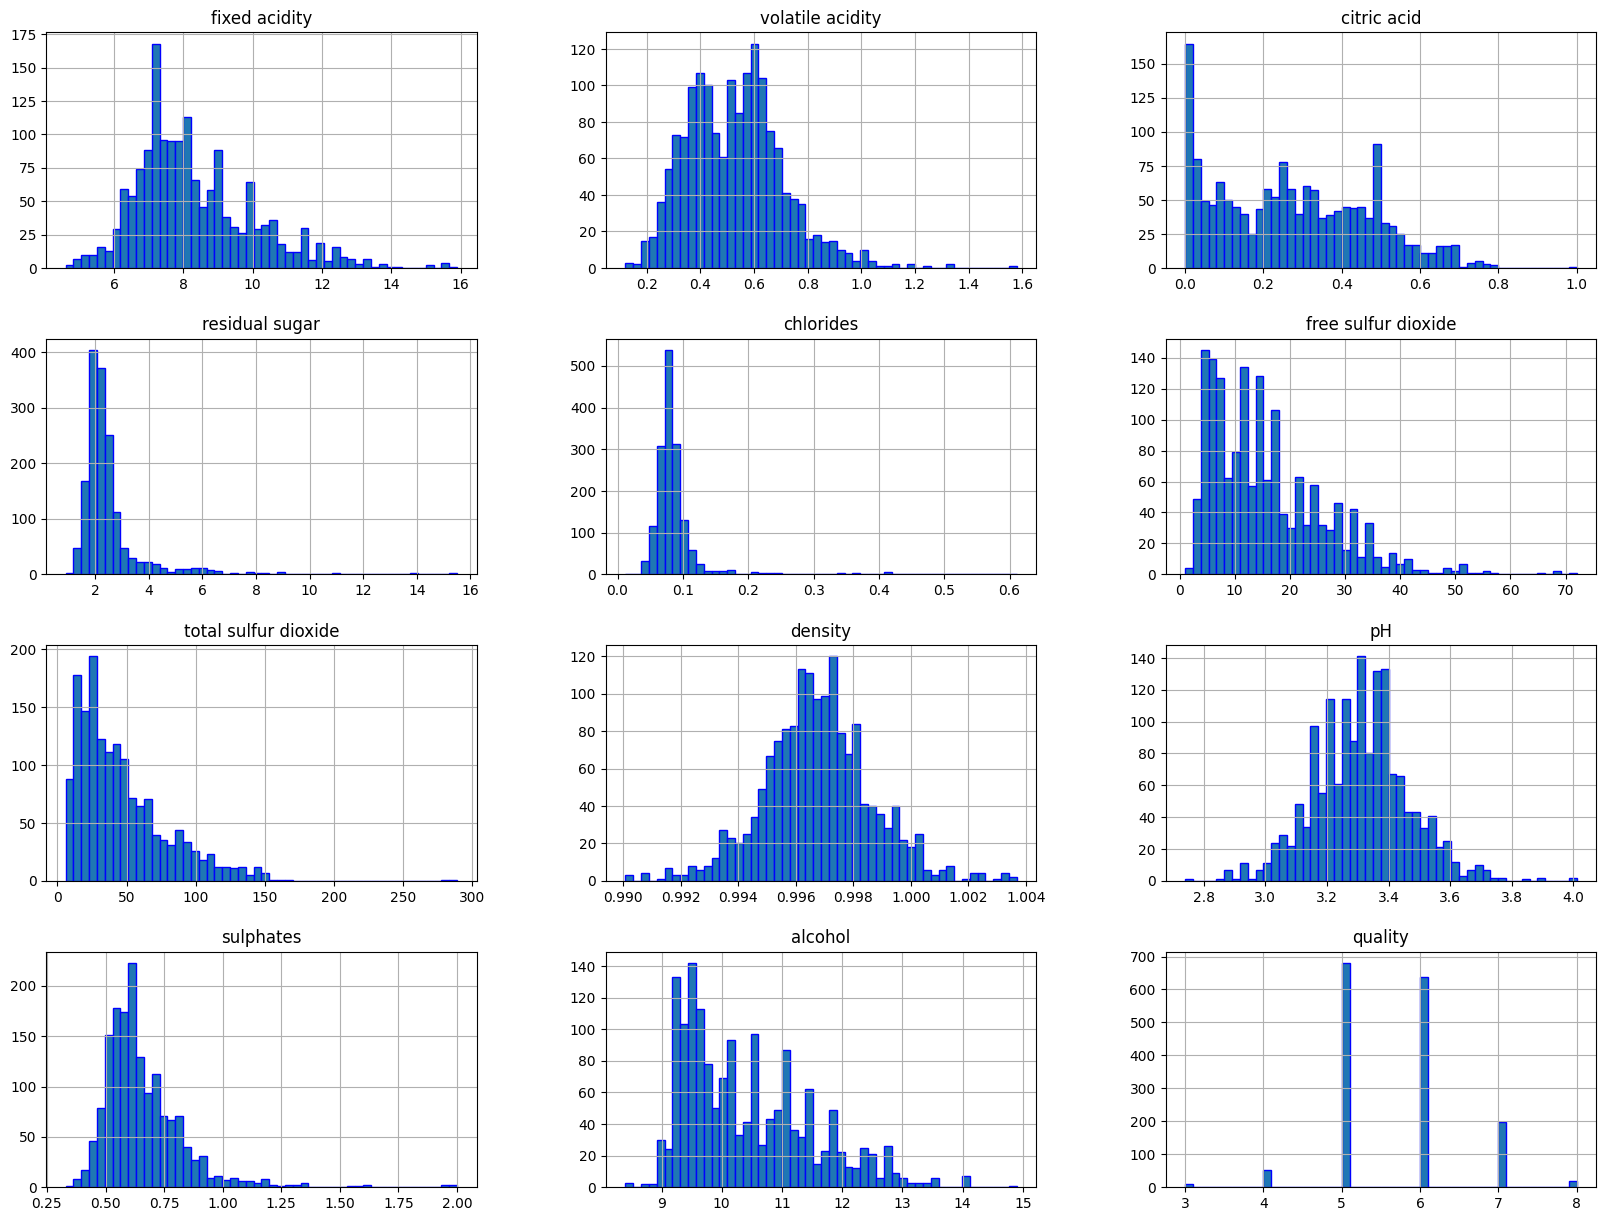

In [15]:
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

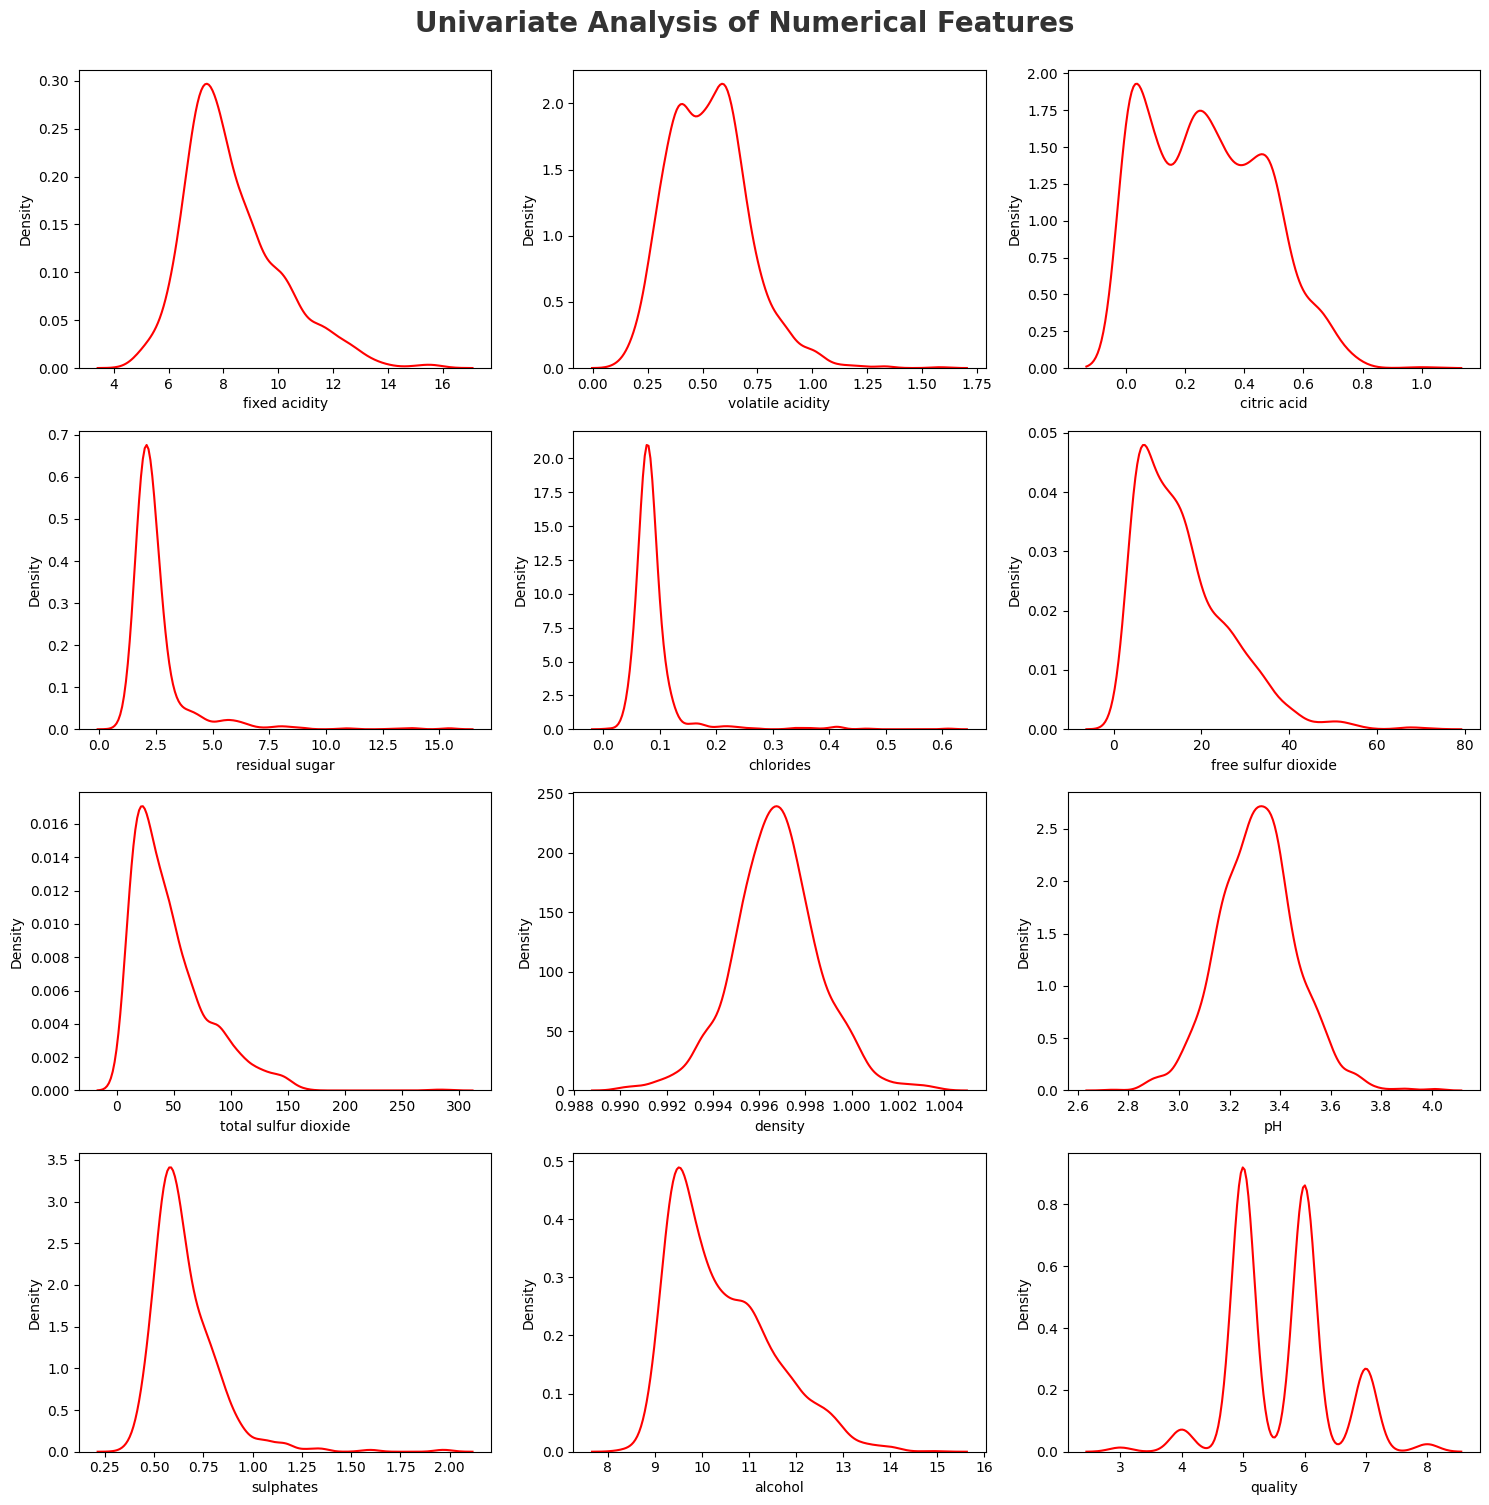

In [17]:
j=1
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in df.columns:
   
    plt.subplot(4,3,j)
    sns.kdeplot(df[i],color="red")
    j = j+1
    plt.tight_layout()

Most of feature are exhibit normality except alcohol, free sulphar dioxide and total sulphar dioxide.

Some common transformations include:<br>
* Log Transformation: For data with right-skewed distributions.
* Square Root Transformation: Useful for reducing the impact of extreme values.
* Box-Cox Transformation: A family of power transformations that can stabilize variance and make data more normal.
* Yeo-Johnson Transformation: Similar to Box-Cox but allows handling both positive and negative values.
* Exponential Transformation: For data with left-skewed distributions.

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = df

# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
from sklearn.decomposition import PCA

# Initialize PCA with all components
pca = PCA()

# Fit PCA and transform the data
X_pca = pca.fit_transform(X_scaled)



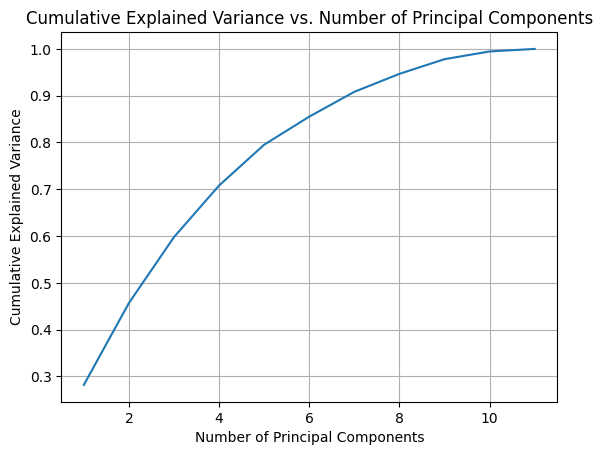

In [20]:
import matplotlib.pyplot as plt

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()


In [21]:
# Find the minimum number of components to explain 90% variance
n_components_90 = (cumulative_variance >= 0.90).sum() + 1
print(f"Minimum components to explain 90% variance: {n_components_90}")


Minimum components to explain 90% variance: 6
